In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datetime import datetime

from pathlib import Path
dataPath = Path("../data")
imagePath = Path("image")

# Load the Database

Import the data from the csv file.

In [2]:
games_orig = pd.read_csv(dataPath / "backloggd_games.csv")


Number of unique developers (the website announced 686 unique developers)

In [3]:
print("Number of unique games :  {:,}".format(games_orig["Title"].nunique()))

Number of unique games :  40,985


# Preview of the the complete data base

In [4]:
games_orig

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,0,Elden Ring,"Feb 25, 2022","['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,2,Hades,"Dec 07, 2018",['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,3,Hollow Knight,"Feb 24, 2017",['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,4,Undertale,"Sep 15, 2015","['tobyfox', '8-4']","A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,Dragon Spirits,"Apr 25, 2023","['FHNBHJ', 'indienova']",While constantly working on a video game witho...,['Windows PC'],['RPG'],NaN,2,0,1,5,3,0
59996,59996,Pathfinder: Kingmaker - Definitive Edition,"Aug 18, 2020","['Owlcat Games', 'Deep Silver']",The Definitive Edition will have all of the DL...,"['PlayStation 4', 'Xbox One']","['RPG', 'Tactical']",3.7,9,0,19,1,7,1
59997,59997,Sainth,"Apr 11, 2008",['Neo Kuriyo'],"Years after the events of ""Wraith"", a young gi...",['Windows PC'],[],NaN,1,0,0,2,0,0
59998,59998,Dragon Spirits,"Apr 25, 2023","['FHNBHJ', 'indienova']",While constantly working on a video game witho...,['Windows PC'],['RPG'],NaN,2,0,1,5,3,0


# Cleaning the data

Only keep the columns necessary for our vizualizations. 

In [5]:
games_columns = games_orig.drop(columns=[games_orig.columns[0], 'Lists'], axis=1)
games_columns

,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Reviews
0,Elden Ring,"Feb 25, 2022","['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,3K
1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,3K
2,Hades,"Dec 07, 2018",['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,2.1K
3,Hollow Knight,"Feb 24, 2017",['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,2.1K
4,Undertale,"Sep 15, 2015","['tobyfox', '8-4']","A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,2.5K
...,...,...,...,...,...,...,...,...,...,...,...,...
59995,Dragon Spirits,"Apr 25, 2023","['FHNBHJ', 'indienova']",While constantly working on a video game witho...,['Windows PC'],['RPG'],NaN,2,0,1,5,0
59996,Pathfinder: Kingmaker - Definitive Edition,"Aug 18, 2020","['Owlcat Games', 'Deep Silver']",The Definitive Edition will have all of the DL...,"['PlayStation 4', 'Xbox One']","['RPG', 'Tactical']",3.7,9,0,19,1,1
59997,Sainth,"Apr 11, 2008",['Neo Kuriyo'],"Years after the events of ""Wraith"", a young gi...",['Windows PC'],[],NaN,1,0,0,2,0
59998,Dragon Spirits,"Apr 25, 2023","['FHNBHJ', 'indienova']",While constantly working on a video game witho...,['Windows PC'],['RPG'],NaN,2,0,1,5,0


In [6]:
games_columns.count()


Title           60000
Release_Date    60000
Developers      60000
Summary         55046
Platforms       60000
Genres          60000
Rating          25405
Plays           60000
Playing         60000
Backlogs        60000
Wishlist        60000
Reviews         60000
dtype: int64

Remove the duplicates from the dataset

In [7]:
games_duplicate = games_columns.drop_duplicates()
games_duplicate.count()

Title           42477
Release_Date    42477
Developers      42477
Summary         38982
Platforms       42477
Genres          42477
Rating          20314
Plays           42477
Playing         42477
Backlogs        42477
Wishlist        42477
Reviews         42477
dtype: int64

Convert Developers, Platforms and Genre into arrays of string

In [8]:
# Convert the string representation to an array of strings
games_string = games_duplicate.copy()
games_string.loc[:,'Genres'] = games_string['Genres'].apply(lambda x : ast.literal_eval(x))
games_string.loc[:,'Platforms'] = games_string['Platforms'].apply(lambda x : ast.literal_eval(x))
games_string.loc[:,'Developers'] = games_string['Developers'].apply(lambda x : ast.literal_eval(x))
games_string

,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Reviews
0,Elden Ring,"Feb 25, 2022","[FromSoftware, Bandai Namco Entertainment]","Elden Ring is a fantasy, action and open world...","[Windows PC, PlayStation 4, Xbox One, PlayStat...","[Adventure, RPG]",4.5,21K,4.1K,5.6K,5.5K,3K
1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","[Nintendo, Nintendo EPD Production Group No. 3]",The Legend of Zelda: Breath of the Wild is the...,"[Wii U, Nintendo Switch]","[Adventure, Puzzle]",4.4,35K,3.1K,5.6K,3K,3K
2,Hades,"Dec 07, 2018",[Supergiant Games],A rogue-lite hack and slash dungeon crawler in...,"[Windows PC, Mac, PlayStation 4, Xbox One, Pla...","[Adventure, Brawler, Indie, RPG]",4.3,25K,3.5K,7.3K,4K,2.1K
3,Hollow Knight,"Feb 24, 2017",[Team Cherry],A 2D metroidvania with an emphasis on close co...,"[Windows PC, Mac, Linux, Nintendo Switch]","[Adventure, Indie, Platform]",4.4,25K,2.7K,9.6K,2.6K,2.1K
4,Undertale,"Sep 15, 2015","[tobyfox, 8-4]","A small child falls into the Underground, wher...","[Windows PC, Mac, Linux, PlayStation 4, Xbox O...","[Adventure, Indie, RPG, Turn Based Strategy]",4.2,32K,728,5.7K,2.1K,2.5K
...,...,...,...,...,...,...,...,...,...,...,...,...
59992,Trace 2,TBD,[],NaN,[],[],NaN,0,0,0,0,0
59993,No Country for Old Men,TBD,[],This is a game combines SIM and SRPG. Please l...,[],"[Indie, RPG, Simulator, Strategy]",NaN,0,0,0,0,0
59994,Sainth,"Apr 11, 2008",[Neo Kuriyo],"Years after the events of ""Wraith"", a young gi...",[Windows PC],[],NaN,1,0,0,2,0
59995,Dragon Spirits,"Apr 25, 2023","[FHNBHJ, indienova]",While constantly working on a video game witho...,[Windows PC],[RPG],NaN,2,0,1,5,0


Convert the numerical values as int

In [9]:
def convert_to_integer(string):
    if string.endswith('K'):
        return int(float(string[:-1]) * 1000)
    else:
        return int(string)
    
games_int = games_string.copy()
games_int.loc[:,'Plays'] = games_int['Plays'].apply(lambda x : convert_to_integer(x))
games_int.loc[:,'Playing'] = games_int['Playing'].apply(lambda x : convert_to_integer(x))
games_int.loc[:,'Backlogs'] = games_int['Backlogs'].apply(lambda x : convert_to_integer(x))
games_int.loc[:,'Wishlist'] = games_int['Wishlist'].apply(lambda x : convert_to_integer(x))
games_int.loc[:,'Reviews'] = games_int['Reviews'].apply(lambda x : convert_to_integer(x))
games_int

,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Reviews
0,Elden Ring,"Feb 25, 2022","[FromSoftware, Bandai Namco Entertainment]","Elden Ring is a fantasy, action and open world...","[Windows PC, PlayStation 4, Xbox One, PlayStat...","[Adventure, RPG]",4.5,21000,4100,5600,5500,3000
1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","[Nintendo, Nintendo EPD Production Group No. 3]",The Legend of Zelda: Breath of the Wild is the...,"[Wii U, Nintendo Switch]","[Adventure, Puzzle]",4.4,35000,3100,5600,3000,3000
2,Hades,"Dec 07, 2018",[Supergiant Games],A rogue-lite hack and slash dungeon crawler in...,"[Windows PC, Mac, PlayStation 4, Xbox One, Pla...","[Adventure, Brawler, Indie, RPG]",4.3,25000,3500,7300,4000,2100
3,Hollow Knight,"Feb 24, 2017",[Team Cherry],A 2D metroidvania with an emphasis on close co...,"[Windows PC, Mac, Linux, Nintendo Switch]","[Adventure, Indie, Platform]",4.4,25000,2700,9600,2600,2100
4,Undertale,"Sep 15, 2015","[tobyfox, 8-4]","A small child falls into the Underground, wher...","[Windows PC, Mac, Linux, PlayStation 4, Xbox O...","[Adventure, Indie, RPG, Turn Based Strategy]",4.2,32000,728,5700,2100,2500
...,...,...,...,...,...,...,...,...,...,...,...,...
59992,Trace 2,TBD,[],NaN,[],[],NaN,0,0,0,0,0
59993,No Country for Old Men,TBD,[],This is a game combines SIM and SRPG. Please l...,[],"[Indie, RPG, Simulator, Strategy]",NaN,0,0,0,0,0
59994,Sainth,"Apr 11, 2008",[Neo Kuriyo],"Years after the events of ""Wraith"", a young gi...",[Windows PC],[],NaN,1,0,0,2,0
59995,Dragon Spirits,"Apr 25, 2023","[FHNBHJ, indienova]",While constantly working on a video game witho...,[Windows PC],[RPG],NaN,2,0,1,5,0


Convert rating as float

In [10]:
games_float = games_int.copy()
games_float.loc[:,'Rating'] = games_float['Rating'].apply(lambda x : float(x))
games_float

,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Reviews
0,Elden Ring,"Feb 25, 2022","[FromSoftware, Bandai Namco Entertainment]","Elden Ring is a fantasy, action and open world...","[Windows PC, PlayStation 4, Xbox One, PlayStat...","[Adventure, RPG]",4.5,21000,4100,5600,5500,3000
1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","[Nintendo, Nintendo EPD Production Group No. 3]",The Legend of Zelda: Breath of the Wild is the...,"[Wii U, Nintendo Switch]","[Adventure, Puzzle]",4.4,35000,3100,5600,3000,3000
2,Hades,"Dec 07, 2018",[Supergiant Games],A rogue-lite hack and slash dungeon crawler in...,"[Windows PC, Mac, PlayStation 4, Xbox One, Pla...","[Adventure, Brawler, Indie, RPG]",4.3,25000,3500,7300,4000,2100
3,Hollow Knight,"Feb 24, 2017",[Team Cherry],A 2D metroidvania with an emphasis on close co...,"[Windows PC, Mac, Linux, Nintendo Switch]","[Adventure, Indie, Platform]",4.4,25000,2700,9600,2600,2100
4,Undertale,"Sep 15, 2015","[tobyfox, 8-4]","A small child falls into the Underground, wher...","[Windows PC, Mac, Linux, PlayStation 4, Xbox O...","[Adventure, Indie, RPG, Turn Based Strategy]",4.2,32000,728,5700,2100,2500
...,...,...,...,...,...,...,...,...,...,...,...,...
59992,Trace 2,TBD,[],NaN,[],[],NaN,0,0,0,0,0
59993,No Country for Old Men,TBD,[],This is a game combines SIM and SRPG. Please l...,[],"[Indie, RPG, Simulator, Strategy]",NaN,0,0,0,0,0
59994,Sainth,"Apr 11, 2008",[Neo Kuriyo],"Years after the events of ""Wraith"", a young gi...",[Windows PC],[],NaN,1,0,0,2,0
59995,Dragon Spirits,"Apr 25, 2023","[FHNBHJ, indienova]",While constantly working on a video game witho...,[Windows PC],[RPG],NaN,2,0,1,5,0


convert the release date as a date

In [11]:
def convert_to_date(date_str):
    if date_str == 'TBD':
        return None  # Return None for "TBD" dates
    else:
        return datetime.strptime(date_str, '%b %d, %Y').date()
    
games_date = games_float.copy()
games_date.loc[:,'Release_Date'] = games_date['Release_Date'].apply(lambda x : convert_to_date(x))
games_date


,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Reviews
0,Elden Ring,2022-02-25,"[FromSoftware, Bandai Namco Entertainment]","Elden Ring is a fantasy, action and open world...","[Windows PC, PlayStation 4, Xbox One, PlayStat...","[Adventure, RPG]",4.5,21000,4100,5600,5500,3000
1,The Legend of Zelda: Breath of the Wild,2017-03-03,"[Nintendo, Nintendo EPD Production Group No. 3]",The Legend of Zelda: Breath of the Wild is the...,"[Wii U, Nintendo Switch]","[Adventure, Puzzle]",4.4,35000,3100,5600,3000,3000
2,Hades,2018-12-07,[Supergiant Games],A rogue-lite hack and slash dungeon crawler in...,"[Windows PC, Mac, PlayStation 4, Xbox One, Pla...","[Adventure, Brawler, Indie, RPG]",4.3,25000,3500,7300,4000,2100
3,Hollow Knight,2017-02-24,[Team Cherry],A 2D metroidvania with an emphasis on close co...,"[Windows PC, Mac, Linux, Nintendo Switch]","[Adventure, Indie, Platform]",4.4,25000,2700,9600,2600,2100
4,Undertale,2015-09-15,"[tobyfox, 8-4]","A small child falls into the Underground, wher...","[Windows PC, Mac, Linux, PlayStation 4, Xbox O...","[Adventure, Indie, RPG, Turn Based Strategy]",4.2,32000,728,5700,2100,2500
...,...,...,...,...,...,...,...,...,...,...,...,...
59992,Trace 2,None,[],NaN,[],[],NaN,0,0,0,0,0
59993,No Country for Old Men,None,[],This is a game combines SIM and SRPG. Please l...,[],"[Indie, RPG, Simulator, Strategy]",NaN,0,0,0,0,0
59994,Sainth,2008-04-11,[Neo Kuriyo],"Years after the events of ""Wraith"", a young gi...",[Windows PC],[],NaN,1,0,0,2,0
59995,Dragon Spirits,2023-04-25,"[FHNBHJ, indienova]",While constantly working on a video game witho...,[Windows PC],[RPG],NaN,2,0,1,5,0


Remove columns without release date, developers, platforms or genre

In [12]:
games_clean = games_date.dropna(subset=['Release_Date'])
games_clean = games_clean[games_clean['Developers'].apply(len) > 0]
games_clean = games_clean[games_clean['Platforms'].apply(len) > 0]
games_clean = games_clean[games_clean['Genres'].apply(len) > 0]
games_clean.count()

Title           28003
Release_Date    28003
Developers      28003
Summary         27137
Platforms       28003
Genres          28003
Rating          17580
Plays           28003
Playing         28003
Backlogs        28003
Wishlist        28003
Reviews         28003
dtype: int64

This data set is now cleaned.

In [13]:
# Save the cleaned dataset
games_clean.to_csv(dataPath / "games_data_clean.csv", index=False)

# Some overviews of this dataset

Number of games per genre

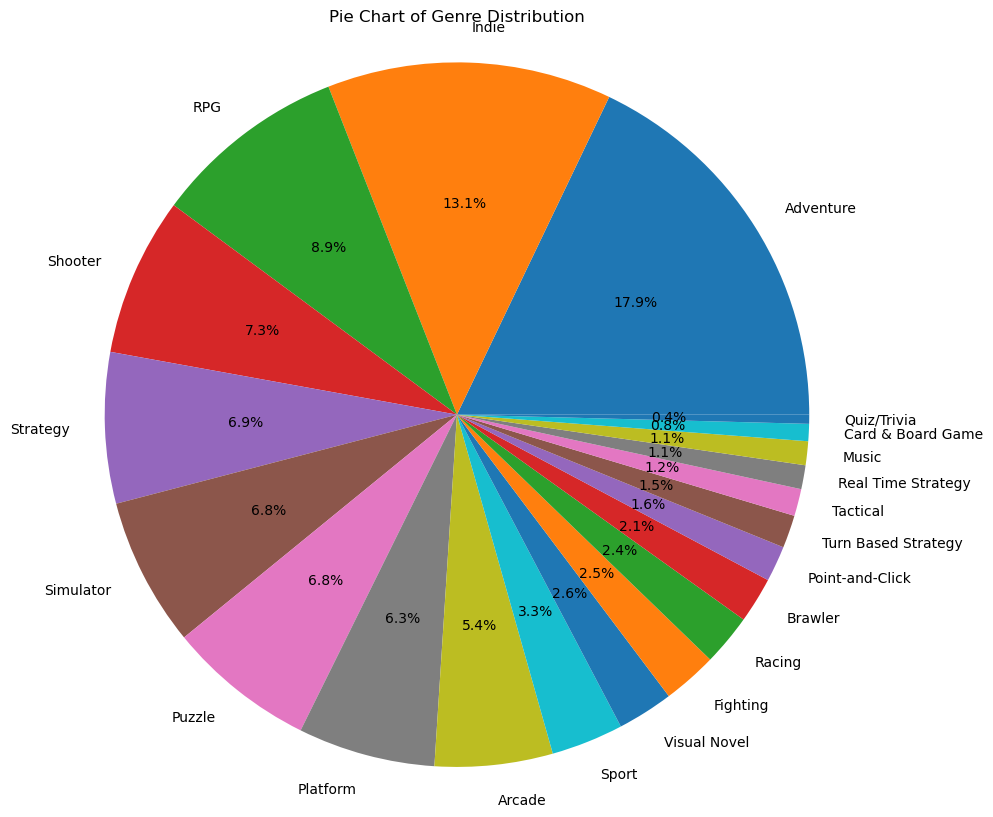

In [14]:
plt.rcParams['figure.figsize'] = [10, 10]

# Flatten the list of genres
all_genres = [genre for sublist in games_clean['Genres'] for genre in sublist]

# Count the occurrences of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Filter out genres with less than 1% occurrence
genre_counts_filtered = genre_counts[genre_counts / genre_counts.sum() >= 0.003]

# Create pie chart
plt.pie(genre_counts_filtered, labels=genre_counts_filtered.index, autopct='%1.1f%%')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title('Pie Chart of Genre Distribution')

# Save image
plt.savefig(imagePath / "genre_pie_chart", bbox_inches='tight')

plt.show()



Number of games per year

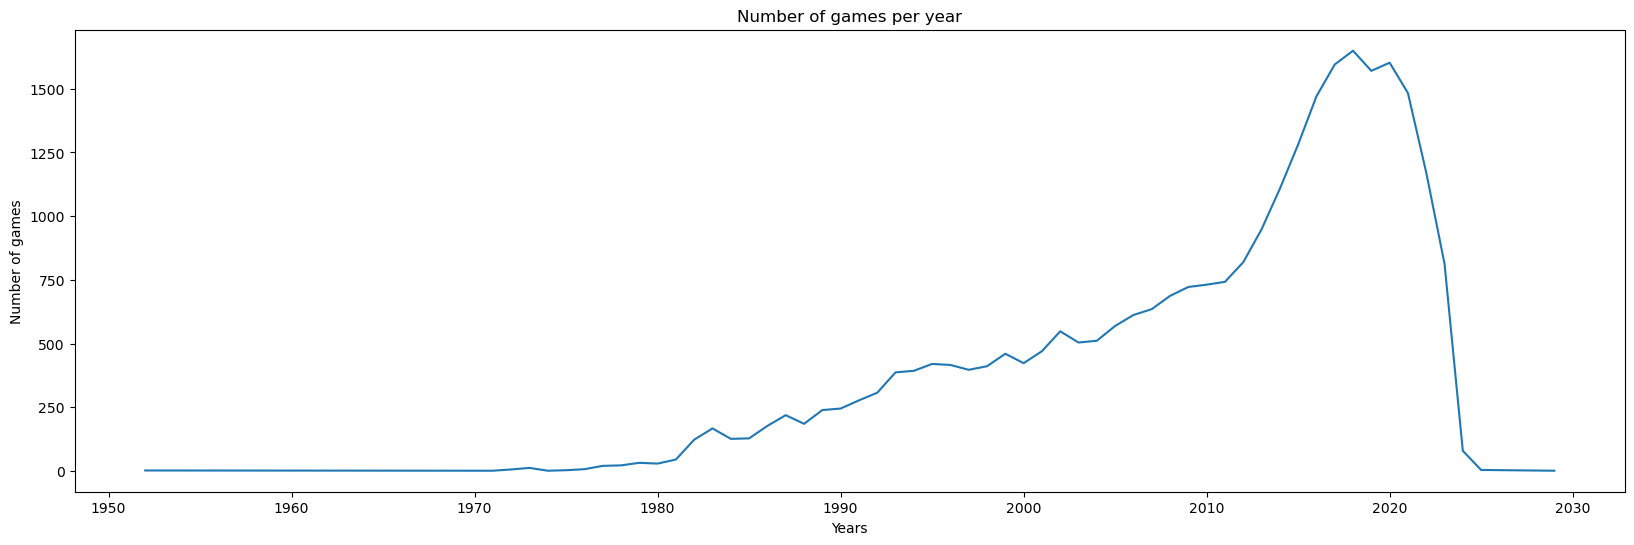

In [15]:
plt.rcParams['figure.figsize'] = [20, 6]

games_per_year = pd.to_datetime(games_clean['Release_Date']).dt.year

games_per_year.value_counts().sort_index().plot()

plt.xlabel("Years")
plt.ylabel("Number of games")
plt.title("Number of games per year")
# Save image
plt.savefig(imagePath / "game_per_year", bbox_inches='tight')
plt.show()

Number of games per platforms

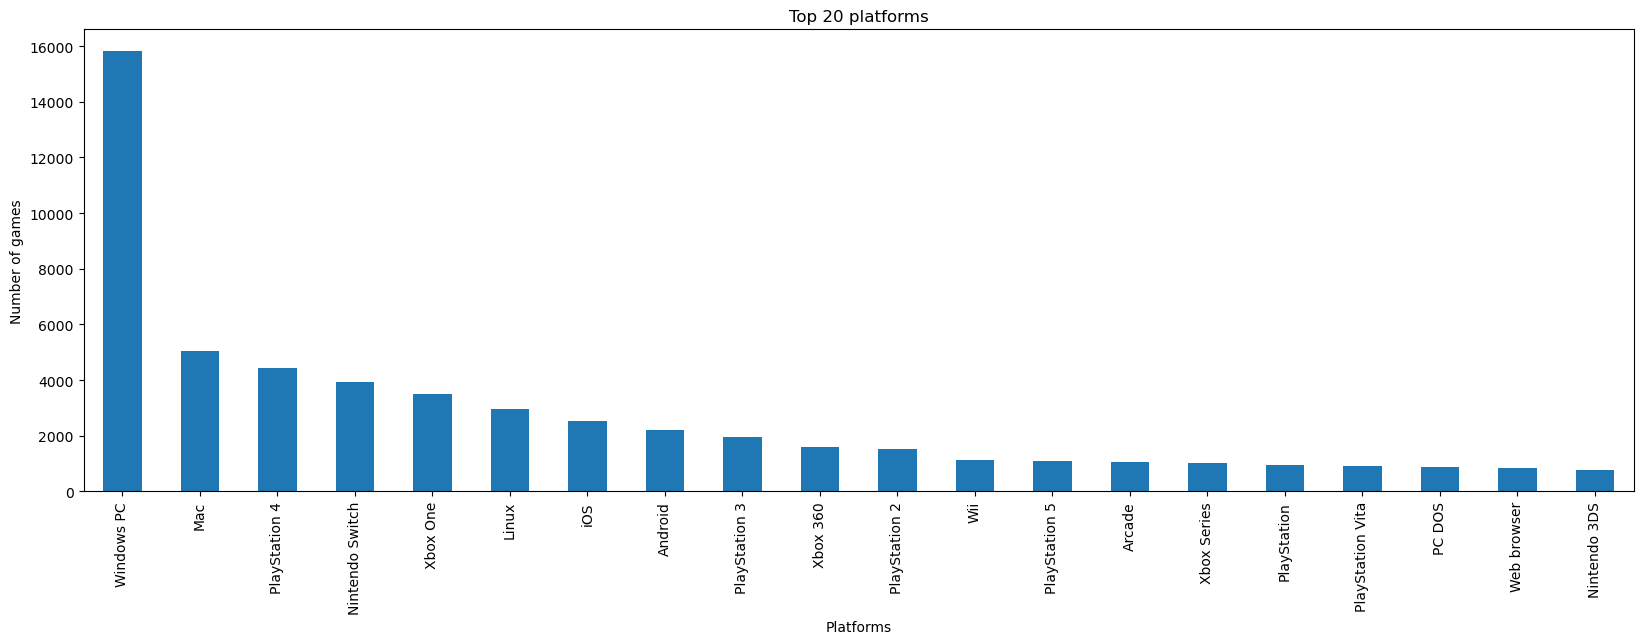

In [16]:
plt.rcParams['figure.figsize'] = [20, 6]

# Flatten the list of genres
all_platforms = [platform for sublist in games_clean['Platforms'] for platform in sublist]

# Count the occurrences of each genre and take only the top 20
platform_counts = pd.Series(all_platforms).value_counts(sort=True, ascending=False).head(20).plot(kind='bar')

plt.xlabel("Platforms")
plt.ylabel("Number of games")
plt.title("Top 20 platforms")
# Save image
plt.savefig(imagePath / "top_20_platforms", bbox_inches='tight')
plt.show()


Top 10 developers

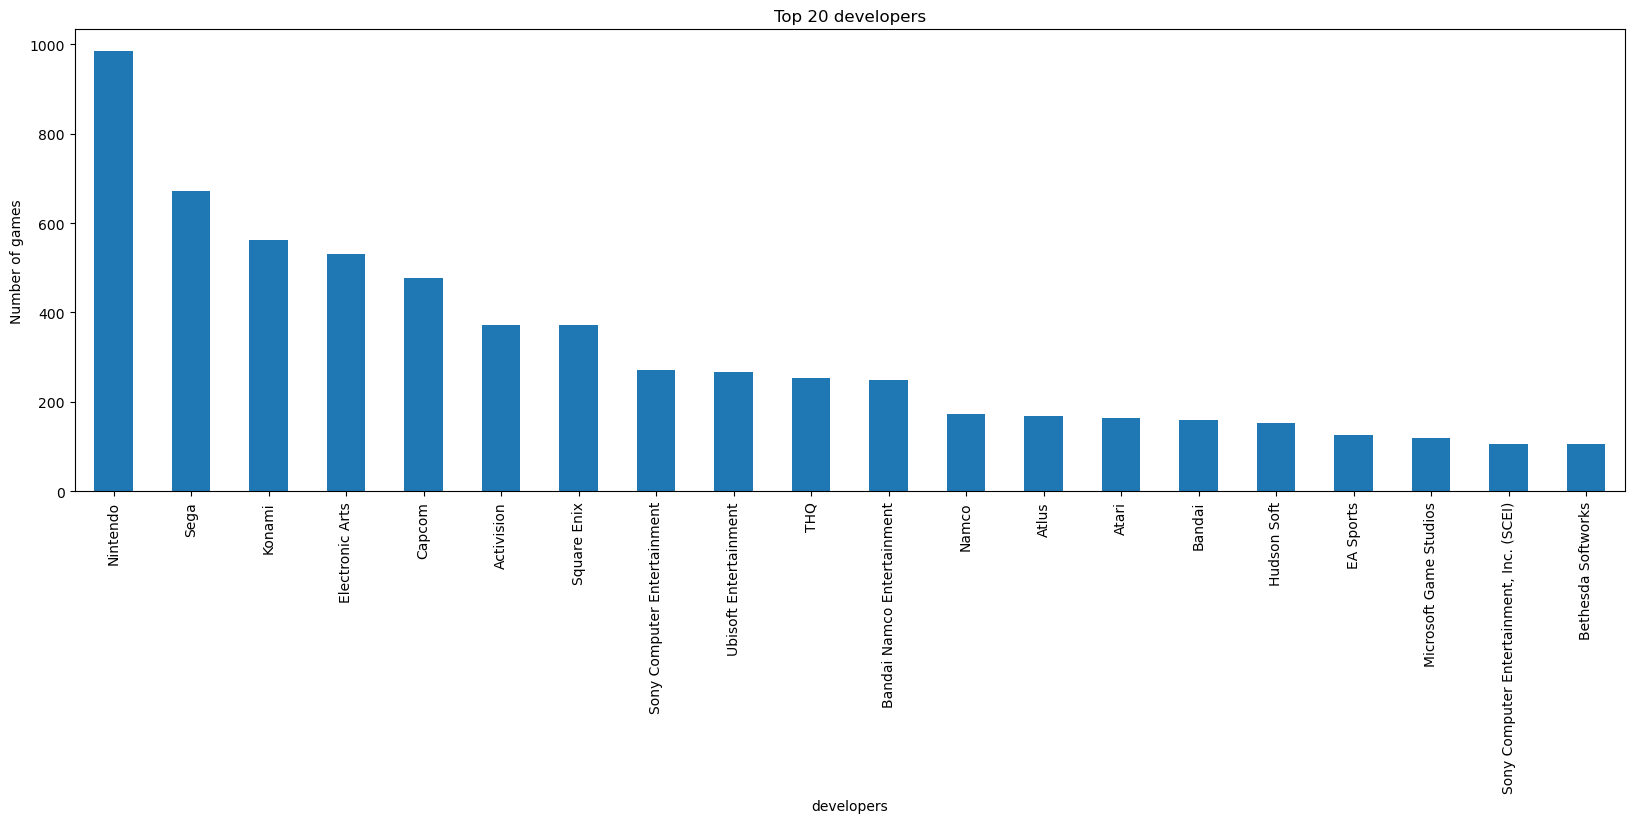

In [17]:
plt.rcParams['figure.figsize'] = [20, 6]

# Flatten the list of genres
all_developers= [developer for sublist in games_clean['Developers'] for developer in sublist]

# Count the occurrences of each genre and take only the top 20
developers_counts = pd.Series(all_developers).value_counts(sort=True, ascending=False).head(20).plot(kind='bar')

plt.xlabel("developers")
plt.ylabel("Number of games")
plt.title("Top 20 developers")
# Save image
plt.savefig(imagePath / "top_20_developers", bbox_inches='tight')
plt.show()

Top 20 games played

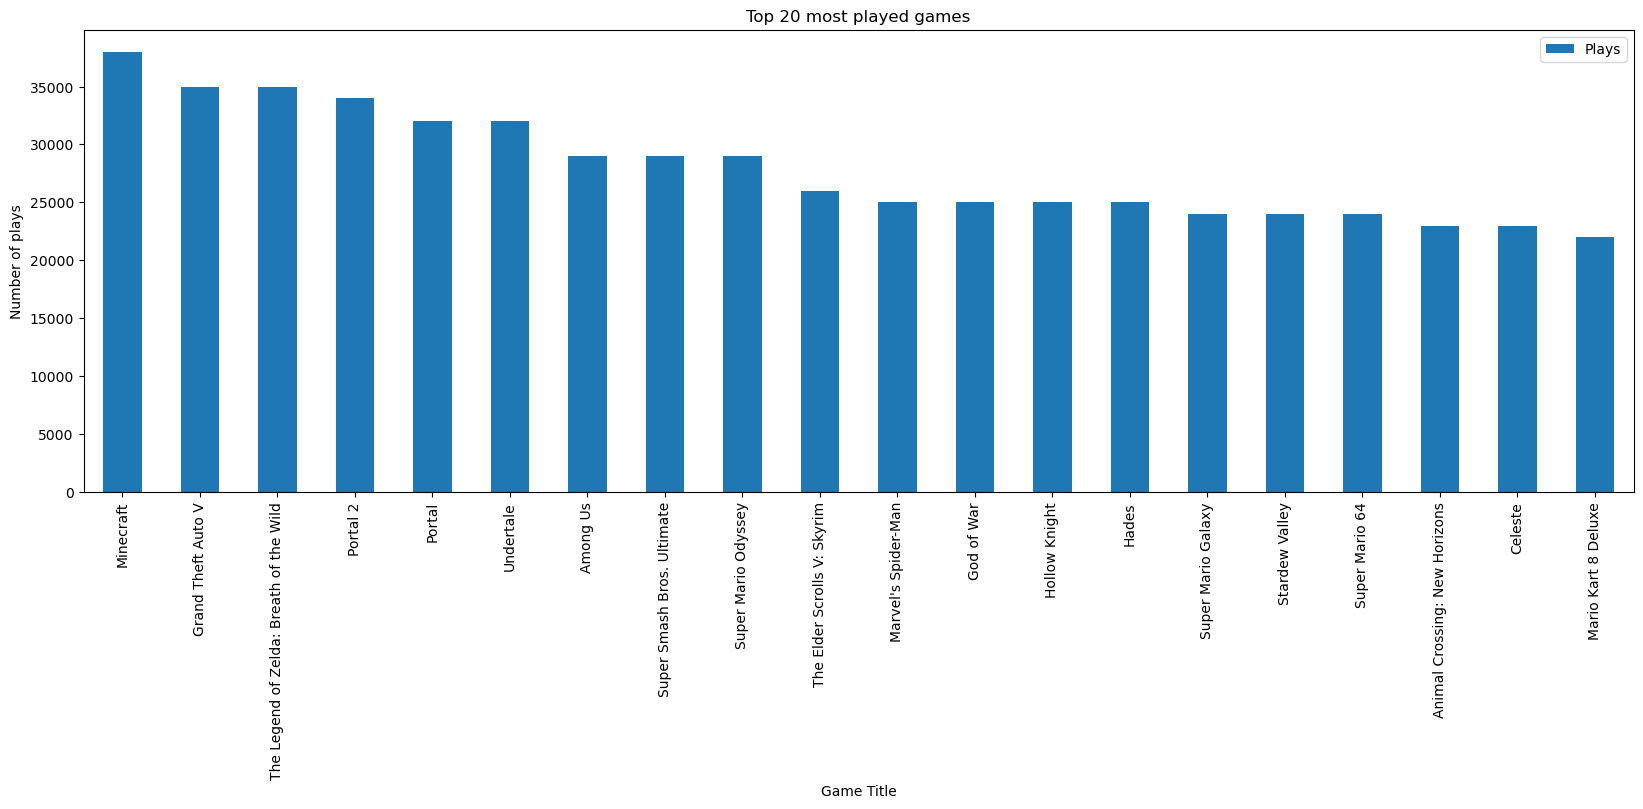

In [18]:
plt.rcParams['figure.figsize'] = [20, 6]

play_per_games = games_clean[['Title', 'Plays']]

# Count the occurrences of each genre and take only the top 20
play_per_games.sort_values(by='Plays', ascending=False).head(20).plot(x='Title', y='Plays', kind='bar')

plt.xlabel("Game Title")
plt.ylabel("Number of plays")
plt.title("Top 20 most played games")
# Save image
plt.savefig(imagePath / "top_20_games_plays", bbox_inches='tight')
plt.show()